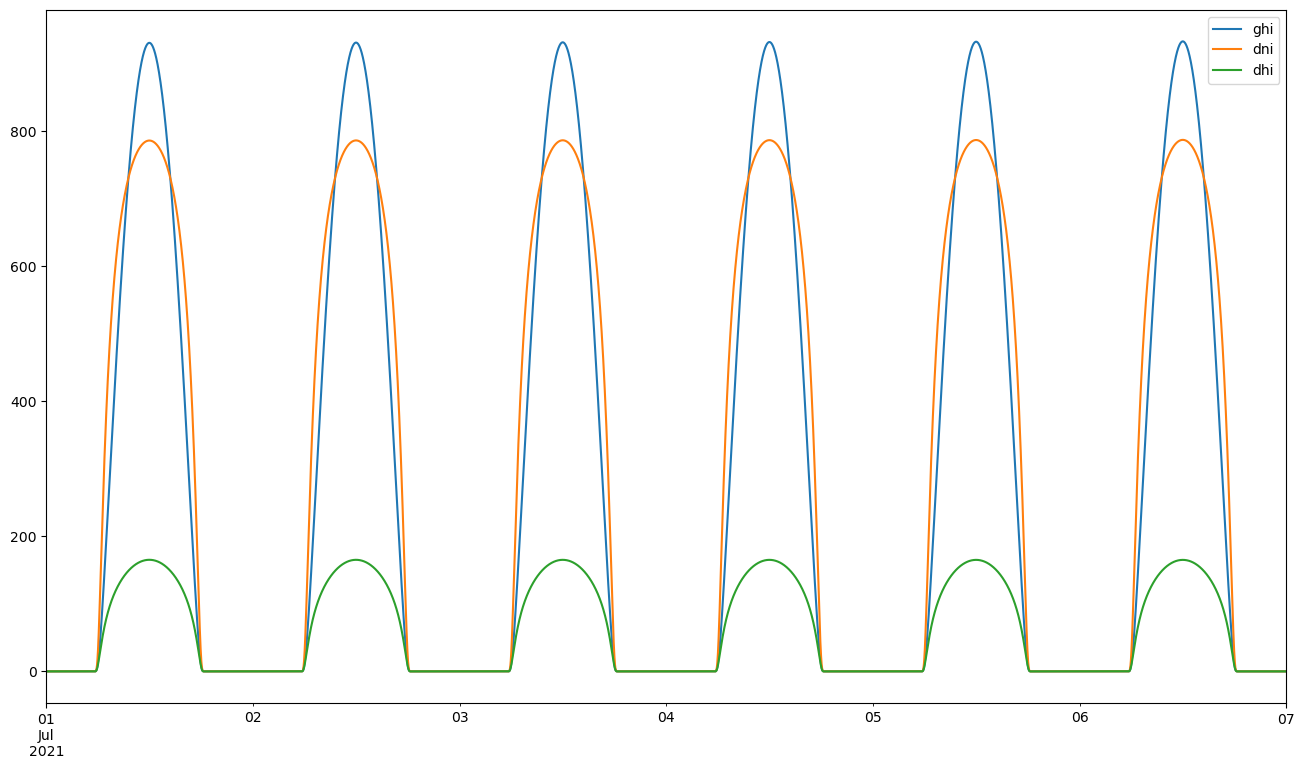

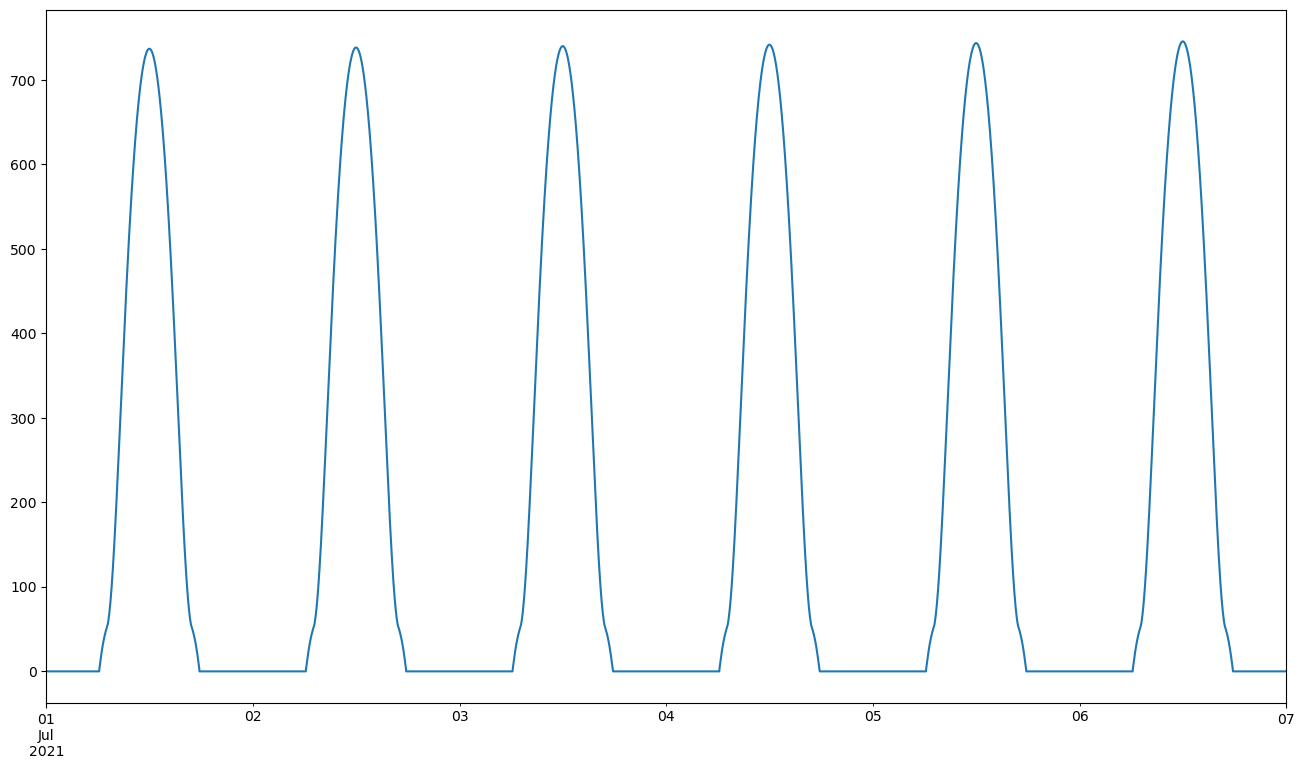

In [28]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

import matplotlib.pyplot as plt

import pandas as pd

location = Location(latitude = 9.948427642217785, longitude = 76.56928756213607, tz = 'Indian/Maldives', altitude = 30, name = 'Home')

sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('CECInverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['ABB__PVI_3_0_OUTD_S_US__208V_']
# print(module)
# print(module.Impo * module.Vmpo)
# print(inverter)
temperature_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

system = PVSystem(surface_tilt=45, surface_azimuth=180,
                  module_parameters=module, inverter_parameters=inverter,
                  temperature_model_parameters=temperature_parameters,
                  modules_per_string=7, strings_per_inverter=1) 
modelChain = ModelChain(system,location)

times = pd.date_range(start = '2021-07-01', end='2021-07-07',
                      freq = '1min', tz = location.tz)

clear_sky = location.get_clearsky(times)
clear_sky.plot(figsize=(16,9))
plt.show()

modelChain.run_model(clear_sky)
modelChain.results.ac.plot(figsize=(16,9))
plt.show()

                     temp_air     ghi     dni     dhi  wind_speed
2021-01-01 00:00:00     23.92    0.00   -0.00    0.00        1.07
2021-01-01 01:00:00     24.37    0.00   -0.00    0.00        1.02
2021-01-01 02:00:00     24.83   76.45    0.00   76.45        0.97
2021-01-01 03:00:00     25.29  425.50  760.58  124.65        0.91
2021-01-01 04:00:00     25.74  604.45  827.77  123.10        0.86
...                       ...     ...     ...     ...         ...
2021-12-31 19:00:00     21.64    0.00   -0.00    0.00        1.34
2021-12-31 20:00:00     22.09    0.00   -0.00    0.00        1.29
2021-12-31 21:00:00     22.55    0.00   -0.00    0.00        1.23
2021-12-31 22:00:00     23.00    0.00   -0.00    0.00        1.18
2021-12-31 23:00:00     23.46    0.00   -0.00    0.00        1.13

[8760 rows x 5 columns]


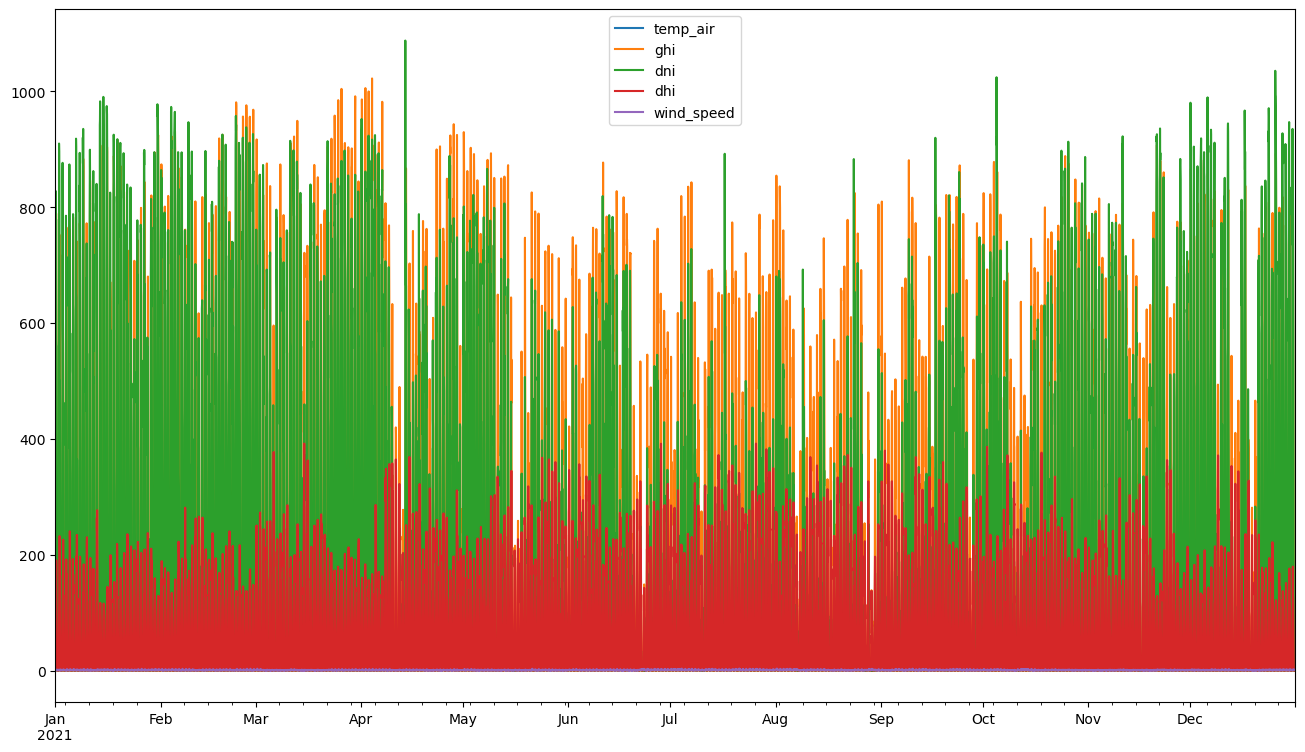

In [29]:
tmy = pd.read_csv('./pvg_east_marady.csv',skiprows=17, nrows=8760,
                  usecols=['time(UTC)','T2m','G(h)','Gb(n)','Gd(h)','WS10m'],
                  index_col=0)

#tmy.index = pd.to_datetime(tmy.index, format="%Y%m%d:%H%M")
tmy.index = pd.date_range(start='2021-01-01 00:00', end='2021-12-31 23:00', freq='h' )

tmy.columns=['temp_air','ghi','dni','dhi','wind_speed']

print(tmy)
tmy.plot(figsize=(16,9))

tmy.to_csv('pvlib_eastMarady.csv')

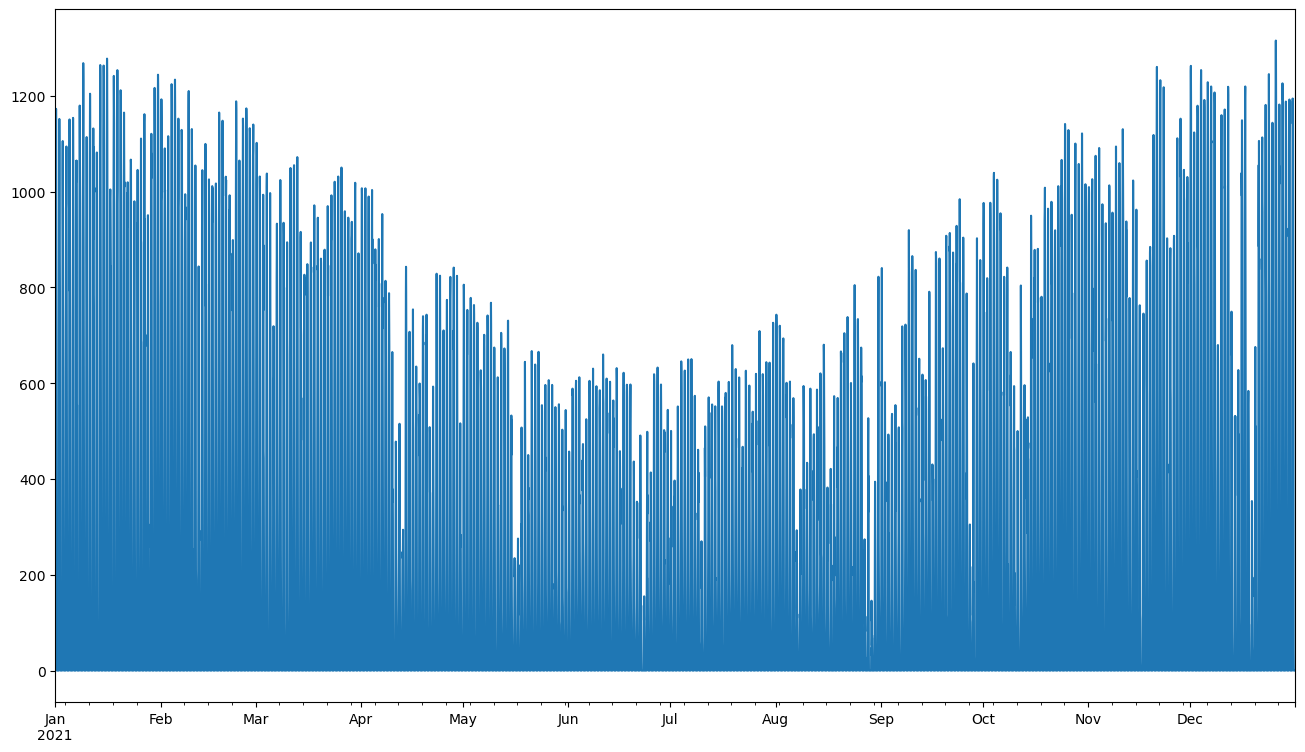

In [30]:
modelChain.run_model(tmy)
modelChain.results.ac.plot(figsize=(16,9))
plt.show()

C:\Users\Paul\AppData\Local\Temp\ipykernel_14960\2060745537.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  modelChain.results.ac.resample("M").sum().plot(figsize=(16,9))


<Axes: >

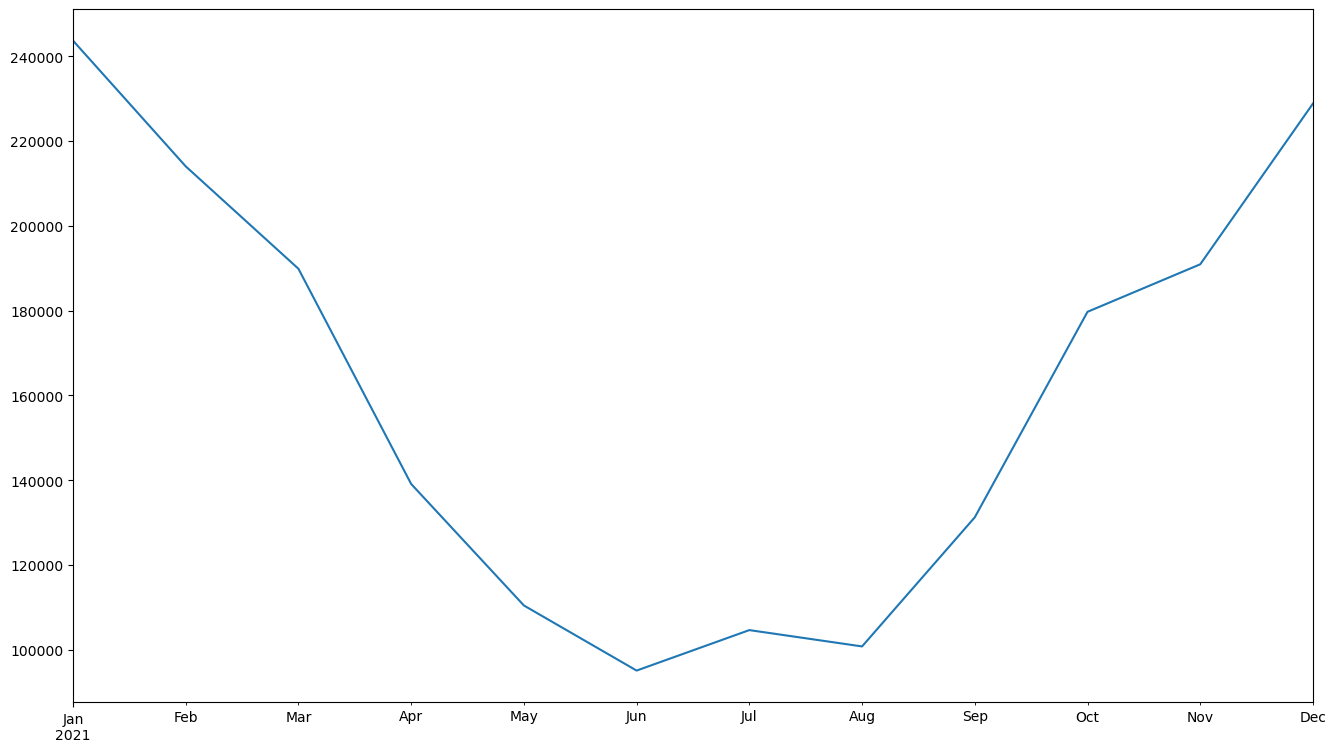

In [31]:
modelChain.results.ac.resample("M").sum().plot(figsize=(16,9))

# FOR A SPECIFIC YEAR 


In [32]:
global_2020 = pd.read_csv("pvgis_2020_global.csv", skiprows=8, nrows=8784, index_col=0)
components_2020 = pd.read_csv("pvgis_2020_components.csv", skiprows=8, nrows=8784, index_col=0)

print(global_2020)
print(components_2020)


                 G(i)  H_sun    T2m  WS10m  Int
time                                           
20200101:0030    0.00   0.00  23.24   0.97  0.0
20200101:0130   15.18   3.56  23.13   0.90  0.0
20200101:0230  279.45  16.85  23.32   0.55  0.0
20200101:0330  567.50  29.56  25.35   0.21  0.0
20200101:0430  723.59  41.19  27.10   0.14  0.0
...               ...    ...    ...    ...  ...
20201231:1930    0.00   0.00  22.72   0.48  0.0
20201231:2030    0.00   0.00  22.52   0.41  0.0
20201231:2130    0.00   0.00  22.91   0.34  0.0
20201231:2230    0.00   0.00  21.76   0.69  0.0
20201231:2330    0.00   0.00  21.44   1.10  0.0

[8784 rows x 5 columns]
                Gb(i)   Gd(i)  Gr(i)  H_sun    T2m  WS10m  Int
time                                                          
20200101:0030    0.00    0.00   0.00   0.00  23.24   0.97  0.0
20200101:0130    0.00   14.62   0.55   3.56  23.13   0.90  0.0
20200101:0230  188.20   85.99   5.26  16.85  23.32   0.55  0.0
20200101:0330  424.46  130.87  12.16

In [ ]:
poa_data_2020 = pd.DataFrame(columns=[
    'poa_global','poa_direct','poa_diffuse','temp_air','wind_speed'],
    index=global_2020.index)
poa_data_2020['poa_global'] = global_2020['G(i)']
poa_data_2020['poa_direct'] = components_2020['Gb(i)']
poa_data_2020['poa_diffuse'] = components_2020['Gb(i)'] + components_2020['Gr(i)']
poa_data_2020['temp_air'] = components_2020['T2m']
poa_data_2020['wind_speed'] = components_2020['WS10m']

# print (poa_data_2020.index)

poa_data_2020.index = pd.to_datetime(poa_data_2020.index, format="%Y%m%d:%H%M")
print(poa_data_2020)

poa_data_2020.to_csv("pvgis_2020_global_mod.csv")

                     poa_global  poa_direct  poa_diffuse  temp_air  wind_speed
time                                                                          
2020-01-01 00:30:00        0.00        0.00         0.00     23.24        0.97
2020-01-01 01:30:00       15.18        0.00         0.55     23.13        0.90
2020-01-01 02:30:00      279.45      188.20       193.46     23.32        0.55
2020-01-01 03:30:00      567.50      424.46       436.62     25.35        0.21
2020-01-01 04:30:00      723.59      549.09       566.00     27.10        0.14
...                         ...         ...          ...       ...         ...
2020-12-31 19:30:00        0.00        0.00         0.00     22.72        0.48
2020-12-31 20:30:00        0.00        0.00         0.00     22.52        0.41
2020-12-31 21:30:00        0.00        0.00         0.00     22.91        0.34
2020-12-31 22:30:00        0.00        0.00         0.00     21.76        0.69
2020-12-31 23:30:00        0.00        0.00         

In [37]:
modelChain.run_model_from_poa(poa_data_2020)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

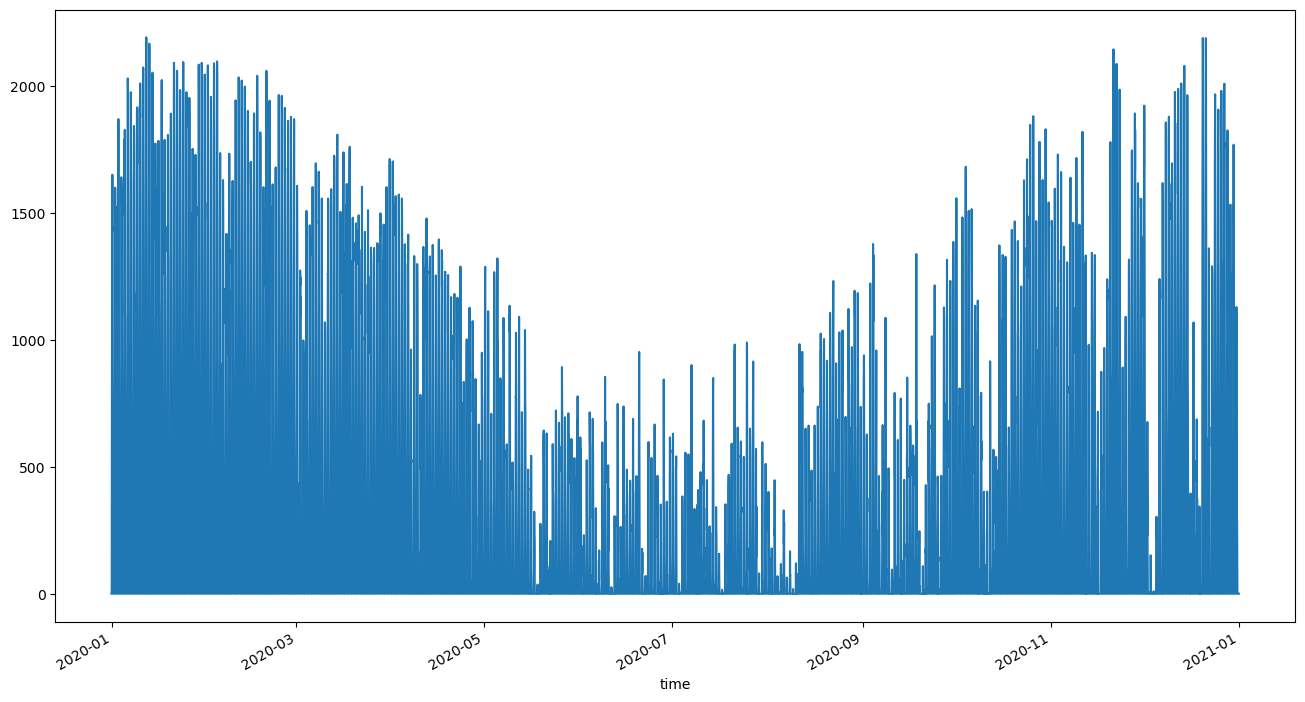

In [38]:
modelChain.results.ac.plot(figsize=(16,9))
plt.show()

# IO TOOLS IN PVLIB

In [46]:
poa_data_2020_api, meta = pvlib.iotools.get_pvgis_hourly(9.948427642217785, 76.56928756213607, start=2020, end=2020, 
                               raddatabase="PVGIS-ERA5", components=True, surface_tilt=45, 
                               surface_azimuth=0, outputformat='json', 
                               usehorizon=True, userhorizon=None, 
                               pvcalculation=False, peakpower=None, 
                               pvtechchoice='crystSi', mountingplace='free', 
                               loss=0, trackingtype=0, optimal_surface_tilt=False, 
                               optimalangles=False, 
                               url='https://re.jrc.ec.europa.eu/api/', 
                               map_variables=True, timeout=30)
print(poa_data_2020_api)
# print(meta)

                           poa_direct  poa_sky_diffuse  poa_ground_diffuse  \
time                                                                         
2020-01-01 00:30:00+00:00        0.00             0.00                0.00   
2020-01-01 01:30:00+00:00        0.00            14.62                0.55   
2020-01-01 02:30:00+00:00        0.00            58.18                2.20   
2020-01-01 03:30:00+00:00        9.84            64.18               12.16   
2020-01-01 04:30:00+00:00       73.11            85.75               16.91   
...                               ...              ...                 ...   
2020-12-31 19:30:00+00:00        0.00             0.00                0.00   
2020-12-31 20:30:00+00:00        0.00             0.00                0.00   
2020-12-31 21:30:00+00:00        0.00             0.00                0.00   
2020-12-31 22:30:00+00:00        0.00             0.00                0.00   
2020-12-31 23:30:00+00:00        0.00             0.00          

In [51]:
poa_data_2020_api['poa_diffuse'] = poa_data_2020_api['poa_sky_diffuse'] + poa_data_2020_api['poa_ground_diffuse']
poa_data_2020_api['poa_global'] = poa_data_2020_api['poa_direct'] + poa_data_2020_api['poa_diffuse']

print(poa_data_2020_api)
poa_data_2020_api.to_csv("poa_data_2020_api.csv")

                           poa_direct  poa_sky_diffuse  poa_ground_diffuse  \
time                                                                         
2020-01-01 00:30:00+00:00        0.00             0.00                0.00   
2020-01-01 01:30:00+00:00        0.00            14.62                0.55   
2020-01-01 02:30:00+00:00        0.00            58.18                2.20   
2020-01-01 03:30:00+00:00        9.84            64.18               12.16   
2020-01-01 04:30:00+00:00       73.11            85.75               16.91   
...                               ...              ...                 ...   
2020-12-31 19:30:00+00:00        0.00             0.00                0.00   
2020-12-31 20:30:00+00:00        0.00             0.00                0.00   
2020-12-31 21:30:00+00:00        0.00             0.00                0.00   
2020-12-31 22:30:00+00:00        0.00             0.00                0.00   
2020-12-31 23:30:00+00:00        0.00             0.00          

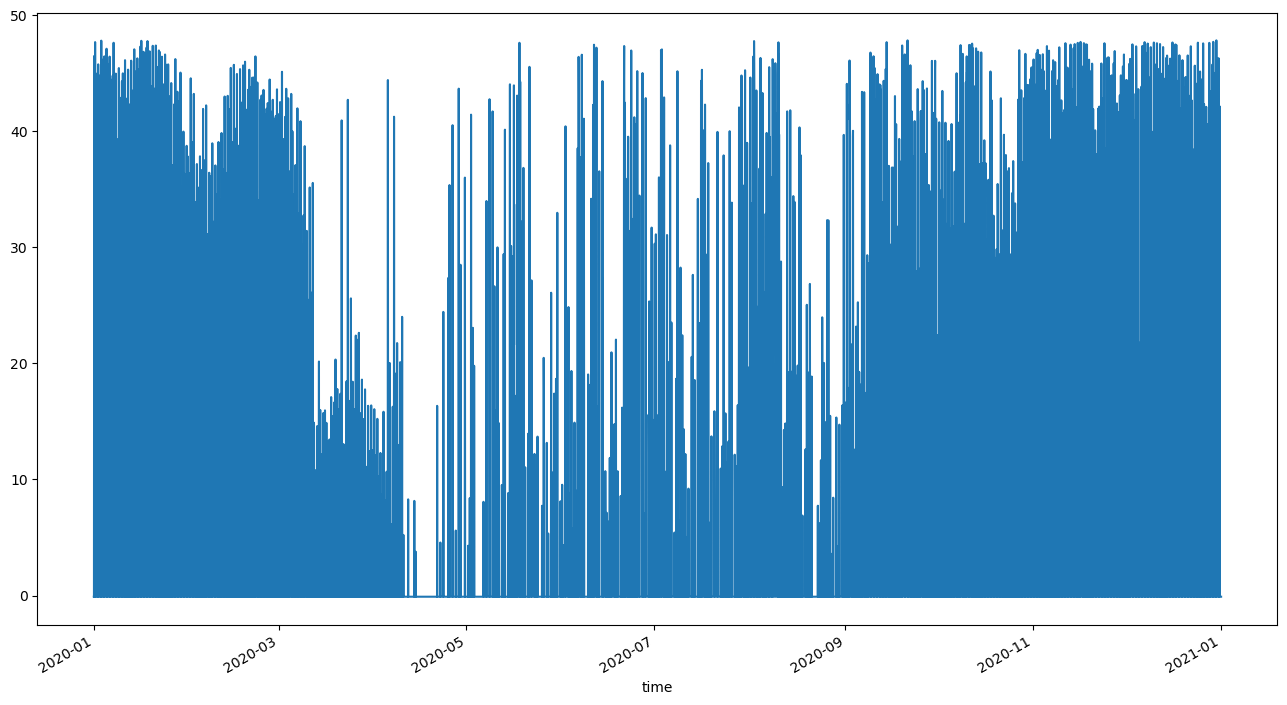

In [52]:
modelChain.run_model_from_poa(poa_data_2020_api)
modelChain.results.ac.plot(figsize=(16,9))
plt.show()